In [2]:
from google.colab import files
uploaded = files.upload()

Saving twitter_test.csv to twitter_test.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv('twitter_training.csv')
test_df = pd.read_csv('twitter_test.csv')

print("Training Data:")
display(train_df.head())

print("\nTest Data:")
display(test_df.head())

Training Data:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...



Test Data:


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
train_df.columns = ['id', 'topic', 'label', 'text']
test_df.columns  = ['id', 'topic', 'label', 'text']

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74681 non-null  int64 
 1   topic   74681 non-null  object
 2   label   74681 non-null  object
 3   text    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      999 non-null    int64 
 1   topic   999 non-null    object
 2   label   999 non-null    object
 3   text    999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [9]:
train_df.isna().sum()

,0
id,0
topic,0
label,0
text,686


In [10]:
test_df.isna().sum()

,0
id,0
topic,0
label,0
text,0


In [11]:
train_df = train_df.dropna(subset=['text','label']).reset_index(drop=True)

In [12]:
train_df.duplicated().sum()

np.int64(2340)

In [13]:
test_df.duplicated().sum()

np.int64(0)

In [14]:
train_df = train_df.drop_duplicates(subset=['text']).reset_index(drop=True)

In [15]:
train_df.duplicated().sum()

np.int64(0)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69490 entries, 0 to 69489
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      69490 non-null  int64 
 1   topic   69490 non-null  object
 2   label   69490 non-null  object
 3   text    69490 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [17]:
train_df.head()

,id,topic,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [18]:
print('Train Shape : {}'.format(train_df.shape))
print('Test Shape : {}'.format(test_df.shape))

Train Shape : (69490, 4)
Test Shape : (999, 4)


In [19]:
train_df['topic'].value_counts()

,count
topic,
MaddenNFL,2260
CallOfDuty,2259
Verizon,2258
NBA2K,2242
Facebook,2226
Microsoft,2224
TomClancysGhostRecon,2220
johnson&johnson,2220
WorldOfCraft,2209


In [20]:
topic_counts = train_df['topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'count']

topic_counts.head()

,topic,count
0,MaddenNFL,2260
1,CallOfDuty,2259
2,Verizon,2258
3,NBA2K,2242
4,Facebook,2226


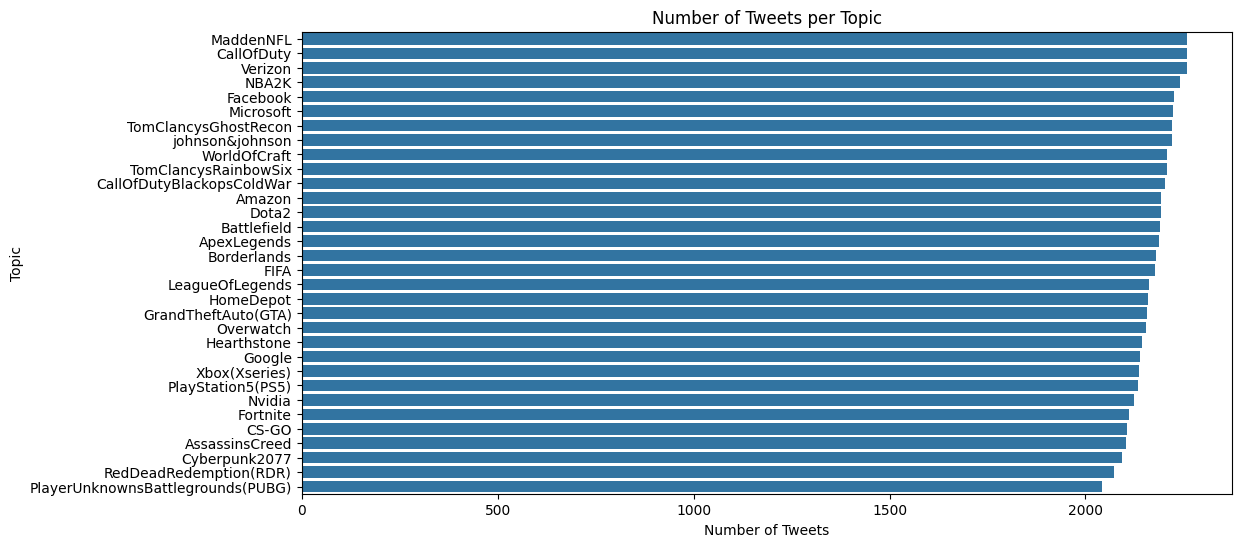

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='topic', data=topic_counts.sort_values('count', ascending=False))
plt.title("Number of Tweets per Topic")
plt.xlabel("Number of Tweets")
plt.ylabel("Topic")
plt.show()

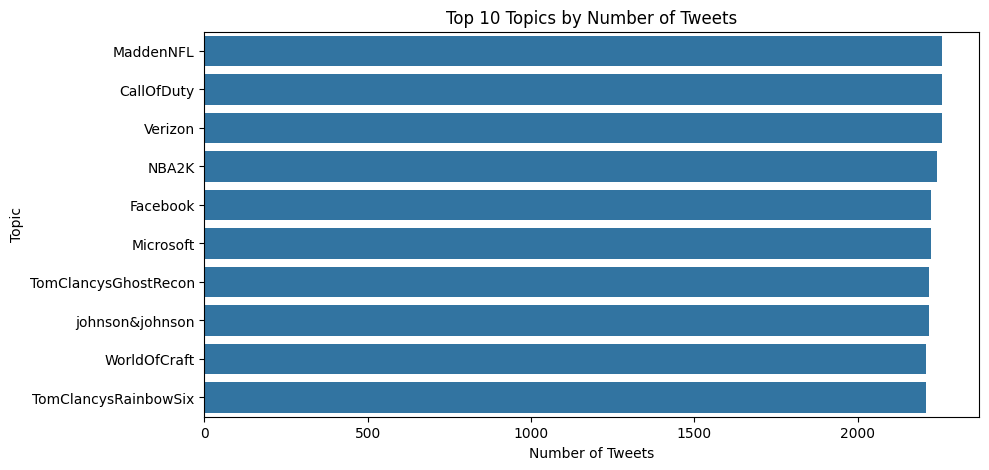

In [22]:
top10 = topic_counts.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='count', y='topic', data=top10)
plt.title("Top 10 Topics by Number of Tweets")
plt.xlabel("Number of Tweets")
plt.ylabel("Topic")
plt.show()


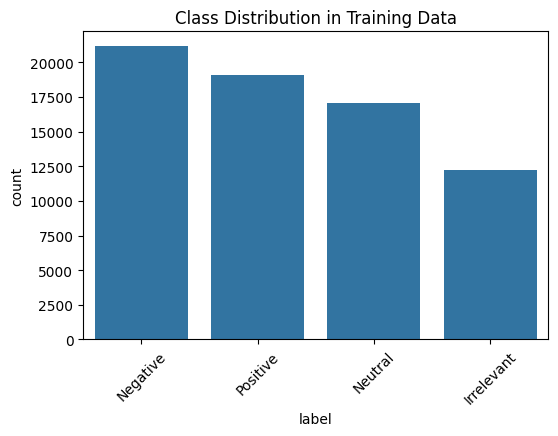

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=train_df, order=train_df['label'].value_counts().index)
plt.title("Class Distribution in Training Data")
plt.xticks(rotation=45)
plt.show()

The Data

Based on the class distribution plot and the counts, the data is imbalanced. The 'Negative' and 'Positive' classes have a higher number of samples compared to 'Neutral' and 'Irrelevant'. .

In [24]:
label_counts = train_df['label'].value_counts()
print(label_counts)

label
Negative      21166
Positive      19066
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64


In [25]:
train_df['text'] = train_df['text'].str.lower()
test_df['text']  = test_df['text'].str.lower()
train_df['text'].head()

,text
0,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...


In [26]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

train_df['text'] = train_df['text'].apply(clean_text)
test_df['text']  = test_df['text'].apply(clean_text)

train_df['text'].head()

,text
0,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...


In [27]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

train_df['text'] = train_df['text'].apply(remove_punctuation)
test_df['text']  = test_df['text'].apply(remove_punctuation)

train_df['text'].head()

,text
0,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...


In [28]:
import re

def remove_emojis(text):
  return re.sub(r'[^A-Za-z0-9\s]', '', text)

train_df['text'] = train_df['text'].apply(remove_emojis)
test_df['text']  = test_df['text'].apply(remove_emojis)

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
stop_words= set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

train_df['text'] = train_df['text'].apply(remove_stopwords)
test_df['text']  = test_df['text'].apply(remove_stopwords)

train_df['text'].head()

,text
0,coming borders kill
1,im getting borderlands kill
2,im coming borderlands murder
3,im getting borderlands 2 murder
4,im getting borderlands murder


In [31]:
train_df.drop(columns=['id'], inplace=True)
test_df.drop(columns=['id'], inplace=True)

In [32]:
train_df.head()

,topic,label,text
0,Borderlands,Positive,coming borders kill
1,Borderlands,Positive,im getting borderlands kill
2,Borderlands,Positive,im coming borderlands murder
3,Borderlands,Positive,im getting borderlands 2 murder
4,Borderlands,Positive,im getting borderlands murder


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF for text
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_text = tfidf.fit_transform(train_df['text'])
X_test_text = tfidf.transform(test_df['text'])

print("TF-IDF shape:", X_text.shape)

TF-IDF shape: (69490, 5000)


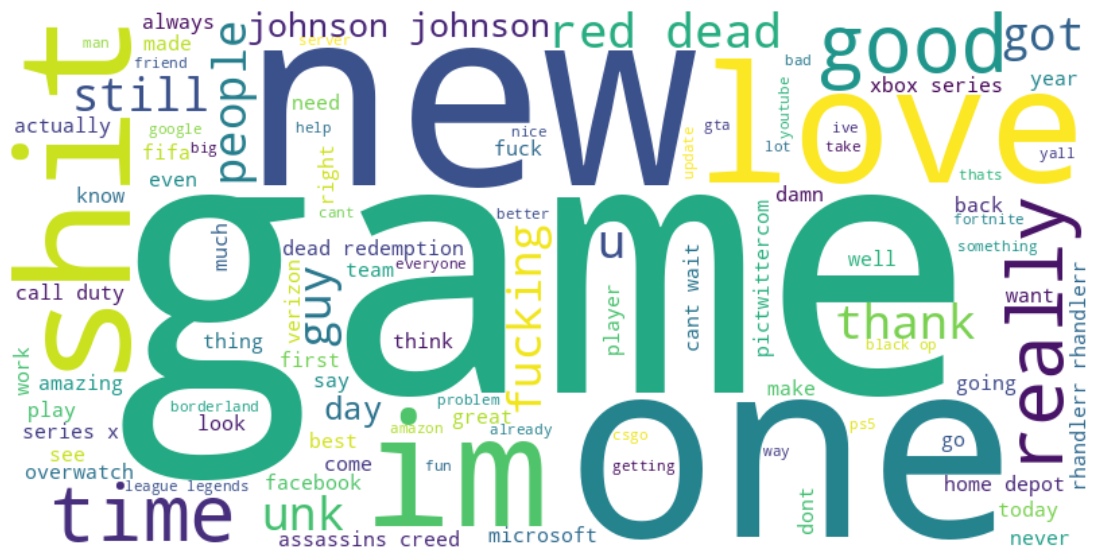

In [34]:
from wordcloud import WordCloud

all_text = " ".join(train_df['text'])

# WordCloud
wc = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [35]:
from sklearn.preprocessing import OneHotEncoder
# hot encoding for topic
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_topic = ohe.fit_transform(train_df[['topic']])
X_test_topic = ohe.transform(test_df[['topic']])

print("Topic encoding shape:", X_topic.shape)

Topic encoding shape: (69490, 32)


In [36]:
# features (Text + Topic)
from scipy.sparse import hstack

X_train = hstack([X_text, X_topic])
X_test  = hstack([X_test_text, X_test_topic])

print("Final train feature matrix shape:", X_train.shape)
print("Final test feature matrix shape:", X_test.shape)

Final train feature matrix shape: (69490, 5032)
Final test feature matrix shape: (999, 5032)


In [37]:
y_train = train_df['label']
y_test  = test_df['label']

print("Labels sample:")
print(y_train.value_counts())

Labels sample:
label
Negative      21166
Positive      19066
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [39]:
lr = LogisticRegression(max_iter=500, class_weight='balanced', multi_class='ovr')  # multi_class='ovr' --> multi-class
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=500, multi_class='ovr')

In [40]:
y_pred = lr.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7957957957957958

Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.69      0.80      0.74       171
    Negative       0.82      0.80      0.81       266
     Neutral       0.83      0.76      0.79       285
    Positive       0.83      0.82      0.83       277

    accuracy                           0.80       999
   macro avg       0.79      0.80      0.79       999
weighted avg       0.80      0.80      0.80       999



In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6776776776776777

Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.63      0.62      0.63       171
    Negative       0.66      0.74      0.70       266
     Neutral       0.73      0.59      0.65       285
    Positive       0.68      0.74      0.71       277

    accuracy                           0.68       999
   macro avg       0.68      0.67      0.67       999
weighted avg       0.68      0.68      0.68       999



In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9769769769769769

Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.98      0.99      0.99       171
    Negative       0.97      0.97      0.97       266
     Neutral       0.97      0.98      0.97       285
    Positive       0.99      0.98      0.98       277

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [None, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Grid Search with Cross-Validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='f1_macro')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 20, 50],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 500]},
             scoring='f1_macro', verbose=1)

In [45]:
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [46]:
y_pred_rf = best_rf.predict(X_test)

In [47]:
print("Random Forest Accuracy (Tuned):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy (Tuned): 0.9569569569569569

Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.94      0.97      0.95       171
    Negative       0.96      0.96      0.96       266
     Neutral       0.95      0.95      0.95       285
    Positive       0.97      0.95      0.96       277

    accuracy                           0.96       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.96      0.96      0.96       999



## 🔍 Insights & Conclusion

- A sentiment classification model was built to categorize tweets into four classes: **Positive, Negative, Neutral, and Irrelevant**.  
- Data cleaning, preprocessing, and exploratory data analysis (EDA) were performed to understand the dataset.  
- Multiple traditional machine learning models were trained and evaluated, including:  
  - **Logistic Regression**  
  - **Multinomial Naive Bayes**  
  - **Random Forest**  
- Among these models, **Random Forest** achieved the best performance with an **accuracy of ~96%** after hyperparameter tuning.  
- Future improvements could involve experimenting with advanced models such as **XGBoost**, **LightGBM**, or transformer-based models like **BERT** for even higher accuracy.
